<a href="https://colab.research.google.com/github/ua-datalab/Workshops/blob/main/SQL_Masterclass/A_SQL_Masterclass_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To run SQL in colab we need some libraries and a database management system.(DBMS) We used duckdb as a DBMS

In [ ]:
%%capture

!pip install jupysql
!pip install duckdb-engine
!wget https://github.com/duckdb/duckdb/releases/download/v0.9.1/duckdb_cli-linux-amd64.zip
!unzip -o duckdb_cli-linux-amd64.zip
!wget https://duckdb.org/data/flights.csv

import duckdb
import pandas as pd

%load_ext sql
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False
%sql duckdb:///:default:


# What is a Database and DBMS?

A **database** is an organized collection of structured/unstructured data, typically stored electronically in a computer system.

A **database management system (DBMS)** is a collection of programs that allow you to create, manage, and operate a database. It serves as an interface between the database and its end users or programs, allowing users to retrieve, update, and manage how the information is organized and optimized.

#What is SQL?

It is a programming language for storing and processing information in a  database.

Full Form: Structured Query Language

# How SQL is different from other programming language like Python?

SQL is optimized to work with a databases. It is very fast in performing operations like retrieving, inserting, updating, and deleting data.

Python is a general-purpose programming language. It can be used for a wide range of tasks, including web development, data analysis, artificial intelligence, automation, and more. It is not optimised to work with databases.

SQL is much simpler to understand. Generally python is used to execute SQL code.

# Why Duckdb

https://duckdb.org/2021/05/14/sql-on-pandas.html

# Databases and Tables

- A DBMS can have many databases. for e.g. marketplace, payments
- A database can have many tables for e.g. marketplace can have tables like orders, customer etc.

Table is the one that actually contains data. We run most of the SQL queries on the tables.

Let's see how a table looks like

Creating a Table:

We have to declare the table name and column names and their datatypes.

Declaring the column names and their datatype is called **schema** of a table. for e.g. python have  int, string datatype

Here **id, name, email, country** are column names of the **users** table.

More [datatypes](https://duckdb.org/docs/sql/data_types/overview.html)

In [ ]:
%%sql

drop table if exists users;
CREATE TABLE if not exists users (
    id INT PRIMARY KEY,
    name VARCHAR(50),
    email VARCHAR(100),
    country VARCHAR(100)
);

,Success


A **row** is just one record in the table. Sometimes, a row is also called a tuple.

**Table** is just colletion of rows/tuples/records.

# Inserting Data:

In [ ]:
%%sql

INSERT INTO users (id, name, email,country)
VALUES (1, 'John Doe', 'john@example.com','US'),
       (2, 'Jane Doe', 'jane@example.com','IN'),
       (3, 'Aang', 'Aang@example.com','US'),
       (10, 'T',NULL ,NULL);

,Success


# Querying Data:





##Syntax:

SELECT [COLUMN NAMES]

FROM [TABLE]

If we want to get all the columns, then we use * in place of column names


In [ ]:
%%sql

SELECT * FROM users;

,id,name,email,country
0,1,John Doe,john@example.com,US
1,2,Jane Doe,jane@example.com,IN
2,3,Aang,Aang@example.com,US
3,10,T,NaN,NaN


#Filtering Data:

Syntax:

SELECT [COLUMN NAMES]

FROM [TABLE]

WHERE [CONDITIONS]

## Operators :

Operators are used to create conditions

- EQUAL =
  - e.g. name = 'John Doe'
-  Less than Greater than  </>
  - e.g. id >1
- BETWEEN  
  - e.g. id betweeen 1 and 2

In [ ]:
%%sql

SELECT *
FROM users
WHERE name = 'John Doe';

,id,name,email,country
0,1,John Doe,john@example.com,US


## Null Values

NULL is like Nan in python which means no value provided for the column.
We can not use = operator to match null values. It's an exception where we need to use  "IS NULL"  or "IS NOT NULL" with column

In [ ]:
%%sql
SELECT *
FROM users
WHERE country is null


,id,name,email,country
0,10,T,NaN,NaN


# Grouping and Aggregating Data:

Syntax:

SELECT [COLUMN NAMES]

FROM [TABLE]

WHERE [CONDITIONS]

GROUP BY [COLUMN NAMES]

HAVING [AGGREGATE COLUMN CONDITIONS]

**Important**- All the columns which are in group by should be in Select

In [ ]:
%%sql
SELECT COUNT(*) FROM users;

,count_star()
0,4


In [ ]:
%%sql
SELECT country, COUNT(*)
FROM users
GROUP BY country;

,country,count_star()
0,US,2
1,IN,1
2,NaN,1


In [ ]:
%%sql
SELECT country, COUNT(*)as user_count
FROM users
GROUP BY country
having user_count>1

,country,user_count
0,US,2


Here aggregate column is user_count

# Views:

In SQL, a view is a virtual table that does not store the actual data itself but represents a stored query that can be executed whenever the view is referenced in a query.

In [ ]:
%%sql
drop view if  exists us_users;
CREATE VIEW if not exists us_users AS
SELECT * FROM users WHERE country = 'US';
select * from us_users;

,id,name,email,country
0,1,John Doe,john@example.com,US
1,3,Aang,Aang@example.com,US


# Joins:

Joins are used to query data from multiple tables

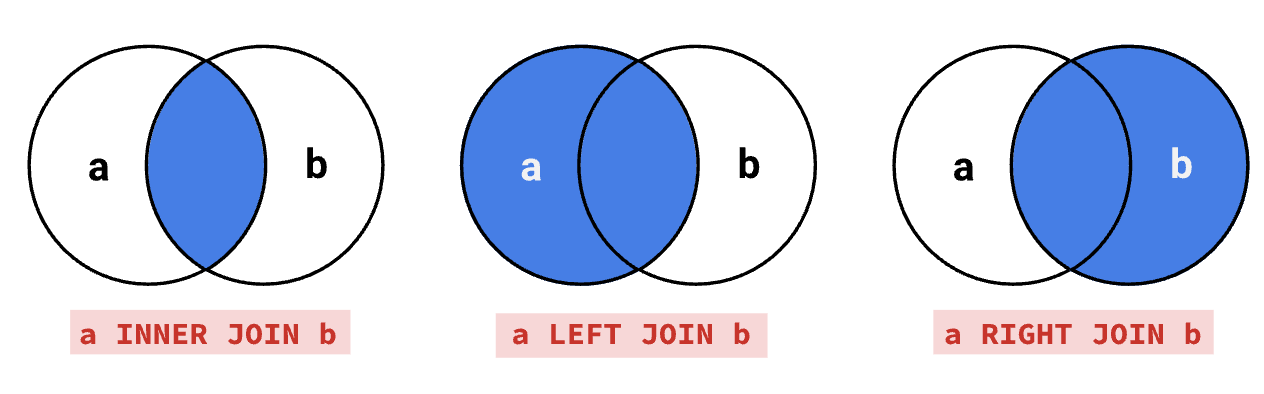

In [ ]:
%%sql

drop table if exists orders;
CREATE TABLE if not exists orders (
    order_id INT PRIMARY KEY,
    user_id INT,
    product VARCHAR(50),
    price int,
    comments VARCHAR(100)
    --, FOREIGN KEY (user_id) REFERENCES users(id)
);

INSERT INTO orders (order_id, user_id, product,price,comments)
VALUES (101, 1, 'Product A',10,'good product'),
       (102, 1, 'Product B',20,'bad product'),
       (103, 3, 'Product C',30,'product good'),
       (104, 4, 'Product D',null,'product bad');


,Success


## Inner Join  

In [ ]:
%%sql

SELECT users.name, orders.product
FROM users
INNER JOIN orders ON users.id = orders.user_id;


,name,product
0,John Doe,Product B
1,Aang,Product C
2,John Doe,Product A


### Aliases

Here, u and o are aliases of users and orders tables

In [ ]:
%%sql

SELECT u.name, o.product
FROM users u
INNER JOIN orders o ON u.id = o.user_id;


,name,product
0,John Doe,Product B
1,Aang,Product C
2,John Doe,Product A


## Left Join

In [ ]:
%%sql

SELECT users.name, orders.product
FROM users
LEFT JOIN orders ON users.id = orders.user_id;

,name,product
0,John Doe,Product B
1,Aang,Product C
2,John Doe,Product A
3,Jane Doe,NaN
4,T,NaN


## Right Join

In [ ]:
%%sql

SELECT users.name, orders.product
FROM users
right JOIN orders ON users.id = orders.user_id;

,name,product
0,John Doe,Product A
1,John Doe,Product B
2,Aang,Product C
3,NaN,Product D


## CROSS JOIN
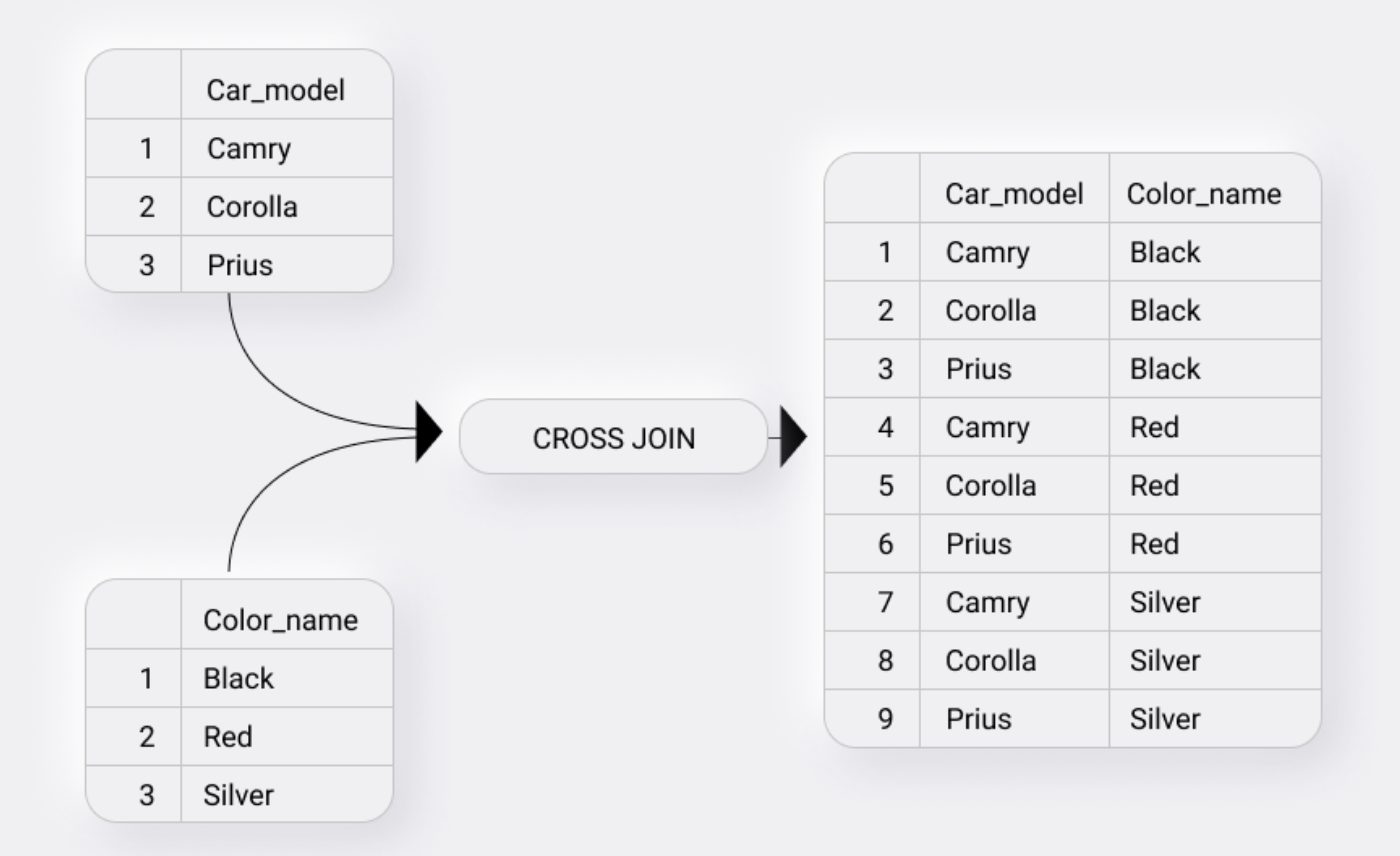

In [ ]:
%%sql

SELECT users.name, orders.product
FROM users
cross join  orders

,name,product
0,John Doe,Product A
1,Jane Doe,Product A
2,Aang,Product A
3,T,Product A
4,John Doe,Product B
5,Jane Doe,Product B
6,Aang,Product B
7,T,Product B
8,John Doe,Product C
9,Jane Doe,Product C


#Important functions:

## CASE

In [ ]:
%%sql

SELECT case
  when product = 'Product A' then 'A'
  when product = 'Product B' then 'B'
  when product = 'Product C' then 'C'
  when product = 'Product D' then 'D'
  end as modified_product_name,*

 FROM orders

,modified_product_name,order_id,user_id,product,price,comments
0,A,101,1,Product A,10.0,good product
1,B,102,1,Product B,20.0,bad product
2,C,103,3,Product C,30.0,product good
3,D,104,4,Product D,NaN,product bad


## SUM, COUNT, AVG, MIN, and MAX

In [ ]:
%%sql

SELECT count(*) as total_count,sum(price) total_price, avg(price) as avg_price, min(price)as min_price, max(price) as max_price

 FROM orders

,total_count,total_price,avg_price,min_price,max_price
0,4,60.0,20.0,10,30


##Eliminating Duplicates

In [ ]:
%%sql
select distinct user_id from orders

,user_id
0,1
1,3
2,4


In [ ]:
%%sql
select count(*),count(distinct user_id) from orders

,count_star(),count(DISTINCT user_id)
0,4,3


##LIKE Operator

In [ ]:
%%sql
select * from orders where comments like '%good%'

,order_id,user_id,product,price,comments
0,101,1,Product A,10,good product
1,103,3,Product C,30,product good


In [ ]:
%%sql
select coalesce(price,10) as non_null_price, * from orders

,non_null_price,order_id,user_id,product,price,comments
0,10,101,1,Product A,10.0,good product
1,20,102,1,Product B,20.0,bad product
2,30,103,3,Product C,30.0,product good
3,10,104,4,Product D,NaN,product bad


## Ordering the Results

In [ ]:
%%sql
select  * from orders order by price desc

,order_id,user_id,product,price,comments
0,103,3,Product C,30.0,product good
1,102,1,Product B,20.0,bad product
2,101,1,Product A,10.0,good product
3,104,4,Product D,NaN,product bad


## Date Functions

In [ ]:
%%sql
select current_date, date_diff('month', DATE '1992-09-15', DATE '1992-11-14') as dd,monthname(DATE '1992-09-20') as mnth,
DATE '1992-03-22' + INTERVAL 5 DAY as interval

,current_date,dd,mnth,interval
0,2023-10-16,2,September,1992-03-27


# Updating Data:

In [ ]:
%%sql
UPDATE users
SET email = 'john.doe@gmail.com'
WHERE id = 1;

,Success


# Deleting Data:

In [ ]:
%%sql
DELETE FROM users WHERE id = 2;

,Success


# Integration with  pandas dataframe

In [ ]:
input_df = pd.DataFrame.from_dict({"i":[1, 2, 3],
                                  "j":["one", "two", "three"]})
input_df



,i,j
0,1,one
1,2,two
2,3,three


In [ ]:
%sql output_df << SELECT sum(i) AS total_i FROM input_df
output_df

,total_i
0,6.0


In [ ]:
%sql output_df << SELECT * from users
output_df

,id,name,email,country
0,1,John Doe,john.doe@gmail.com,US
1,3,Aang,Aang@example.com,US
2,10,T,NaN,NaN


# Read Csv

In [ ]:
%%sql
SELECT * FROM read_csv_auto('flights.csv')

,FlightDate,UniqueCarrier,OriginCityName,DestCityName
0,1988-01-01,AA,"New York, NY","Los Angeles, CA"
1,1988-01-02,AA,"New York, NY","Los Angeles, CA"
2,1988-01-03,AA,"New York, NY","Los Angeles, CA"


In [ ]:
!./duckdb -c "DESCRIBE SELECT * FROM read_csv_auto('flights.csv')"

┌────────────────┬─────────────┬─────────┬─────────┬─────────┬─────────┐
│  column_name   │ column_type │  null   │   key   │ default │  extra  │
│    varchar     │   varchar   │ varchar │ varchar │ varchar │ varchar │
├────────────────┼─────────────┼─────────┼─────────┼─────────┼─────────┤
│ FlightDate     │ DATE        │ YES     │         │         │         │
│ UniqueCarrier  │ VARCHAR     │ YES     │         │         │         │
│ OriginCityName │ VARCHAR     │ YES     │         │         │         │
│ DestCityName   │ VARCHAR     │ YES     │         │         │         │
└────────────────┴─────────────┴─────────┴─────────┴─────────┴─────────┘


In [ ]:
%%sql
CREATE TABLE if not exists flights_data as select * from read_csv_auto('flights.csv');
Select * from flights_data

,FlightDate,UniqueCarrier,OriginCityName,DestCityName
0,1988-01-01,AA,"New York, NY","Los Angeles, CA"
1,1988-01-02,AA,"New York, NY","Los Angeles, CA"
2,1988-01-03,AA,"New York, NY","Los Angeles, CA"


# Exercises

1. Write a query to create a table named **payments** which has following t columns and insert one record.

- comments string -- 'Credit Card'
- id int -- 1
- transaction_date date - '2023-10-14'
- transaction_datetime timestamp '2023-10-14 23:59:59'

Run a query to print the records of the table


Expected Output:

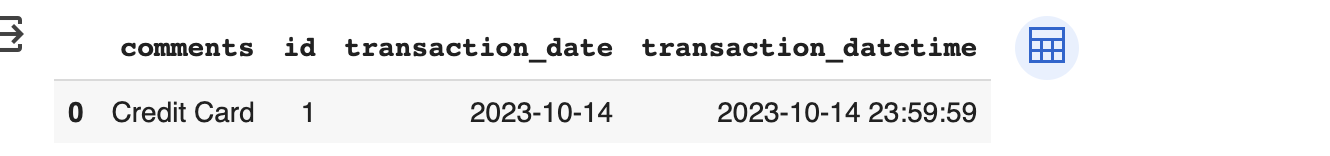

2. Write a SQL query to get users who did not place an order


Expected Output:

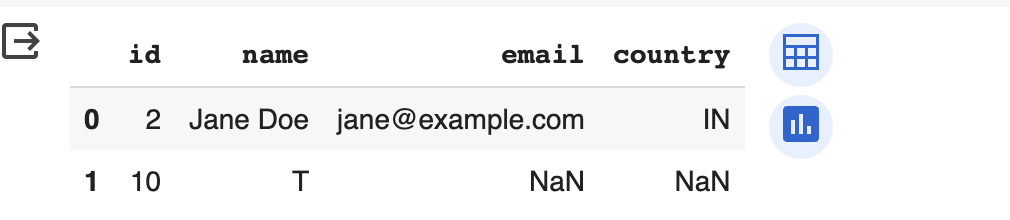

3. Write a query to delete all the records from the payments table. Run select query on the table to check if all the records are deleted.


4. Write queries to get the users who placed maximum and minimum number of orders (atleast 1 order)


Max order Expected Output:
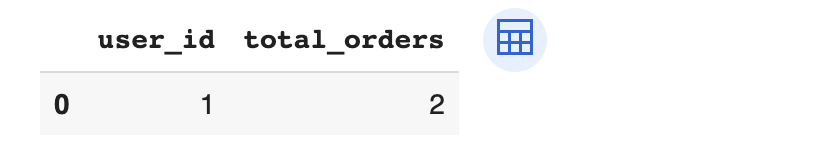

Min Order Expected Output:

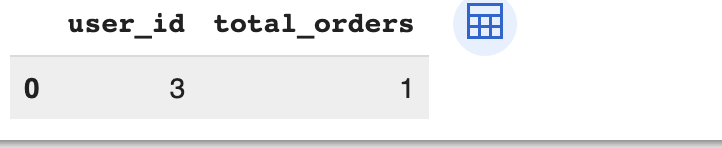
